In [1]:
import pandas as pd
import glob

## Generating pickups for each day

In [2]:
%cd
%cd Documents/TaxiTripData/uber-tlc-foil-response-master/uber-trip-data/
%ls


/home/proctortc
/home/proctortc/Documents/TaxiTripData/uber-tlc-foil-response-master/uber-trip-data
taxi-zone-lookup.csv     uber-raw-data-janjune-15.csv  uber-raw-data-may14.csv
uber-raw-data-apr14.csv  uber-raw-data-jul14.csv       uber-raw-data-sep14.csv
uber-raw-data-aug14.csv  uber-raw-data-jun14.csv


#### Reading the big 2015 file:

In [3]:
pd.read_csv(glob.glob('*15.csv')[0],nrows=5)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [21]:
iterate=pd.read_csv(glob.glob('*15.csv')[0],usecols=[1],iterator=True,chunksize=10000)
countlist=[]
for chunk in iterate:
    countlist.append(pd.to_datetime(chunk['Pickup_date']).dt.date.value_counts())

#### Reading small monthly 2014 files

In [27]:
rawdatafiles14=glob.glob('uber-raw-data-*14.csv')
rawdatafiles14

['uber-raw-data-sep14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-may14.csv']

In [29]:
#this takes way too long
for i in rawdatafiles14:
    countlist.append(pd.to_datetime(pd.read_csv(i,usecols=[0])['Date/Time']).dt.date.value_counts())
    

In [74]:
%cd
%cd Documents/TaxiTripData/uber-tlc-foil-response-master/
%ls

/home/proctortc
/home/proctortc/Documents/TaxiTripData/uber-tlc-foil-response-master
Aggregate FHV Data.xlsx*  TLC_letter2.pdf  Uber-Jan-Feb-FOIL.csv*
other-FHV-data/           TLC_letter3.pdf  uber-trip-data/
README.md                 TLC_letter.pdf


#### Combine the list:

In [57]:
cond=pd.concat(countlist)
cond=cond.groupby(cond.index).sum()

In [58]:
cond.index=pd.to_datetime(cond.index)

In [6]:
cond.index

DatetimeIndex(['2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04',
               '2014-04-05', '2014-04-06', '2014-04-07', '2014-04-08',
               '2014-04-09', '2014-04-10', 
               ...
               '2015-06-21', '2015-06-22', '2015-06-23', '2015-06-24',
               '2015-06-25', '2015-06-26', '2015-06-27', '2015-06-28',
               '2015-06-29', '2015-06-30'],
              dtype='datetime64[ns]', length=364, freq=None, tz=None)

#### Export it

In [18]:
%cd
%cd Desktop/SRDataIntensive/DataStory/
cond.to_pickle('uber_date_counts.pkl')

/home/proctortc
/home/proctortc/Dropbox/Private/DataScienceApps/SlideRuleDataIntensive/DataStory


## Analysis

In [2]:
cond=pd.read_pickle('uber_date_counts.pkl')


#### Monthly data

array([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 20

In [3]:
months=pd.DataFrame(cond)

In [4]:
months=pd.DataFrame(cond)
months['month']=months.index.month
months['year']=months.index.year
months=months.groupby(['year','month']).sum()

In [5]:
months

0
year month         
2014 4       564516
     5       652435
     6       663844
     7       796121
     8       829275
     9      1028136
2015 1      1953801
     2      2263620
     3      2259773
     4      2280837
     5      2695553
     6      2816895

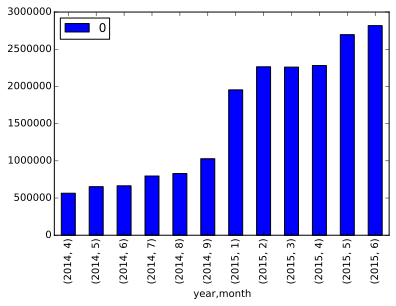

In [6]:
months.plot(kind='bar')

Uber is clearly growing pretty steadily, but it doesn't look like exponential growth.

#### Day of the week

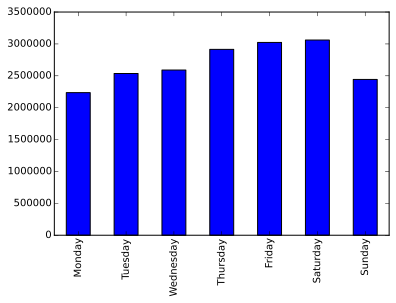

In [17]:
dow=cond.copy()
dow.index=dow.index.weekday
dow=dow.groupby(dow.index).sum()
dow.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow.plot(kind='bar')

Surprisingly (to me) the most popular time to uber is not during rush hour, it is on weekend nights. It could be because of the inconsistentcies of the Subway on weekends, especially at night, 